In [1]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

/tmp/ipykernel_25403/47578708.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [1]:
import torch
print("Using torch", torch.__version__)

Using torch 2.0.0+cu117


In [2]:
torch.manual_seed(42) # Setting the seed

In [3]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [4]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [5]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [6]:
torch.rand(2, 3)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

In [7]:
torch.randn(2, 3)

tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])

In [8]:
torch.arange(0, 10, 1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
l = [1, 2, 3, 4, 5]
torch.tensor(l)

tensor([1, 2, 3, 4, 5])

In [10]:
torch.Tensor(l)

tensor([1., 2., 3., 4., 5.])

In [12]:
x = torch.rand(2,3,4)

In [15]:
shape = x.shape
print("Shape of x:", shape)

size = x.size()
print("Size of x:", size)

dim1, dim2, dim3 = x.size()
print("Corresponding to dim1, dim2, dim3:", dim1, dim2, dim3)



Shape of x: torch.Size([2, 3, 4])
Size of x: torch.Size([2, 3, 4])
Corresponding to dim1, dim2, dim3: 2 3 4


#### Numpy to tensor and vice versa


In [20]:
import numpy as np
x = np.array([[1, 2], [3, 4]])
x_tensor = torch.from_numpy(x) # To Convert the numpy array to a PyTorch tensor, use the from_numpy method
print("NumPy array:\n", x)
print("PyTorch tensor: \n", x_tensor)

NumPy array:
 [[1 2]
 [3 4]]
PyTorch tensor: 
 tensor([[1, 2],
        [3, 4]])


In [21]:
tensor = torch.arange(4)
np_array = tensor.numpy() # To convert a PyTorch tensor to a numpy array, use the numpy() method

print("PyTorch tensor:", tensor)
print("NumPy array:", np_array)

PyTorch tensor: tensor([0, 1, 2, 3])
NumPy array: [0 1 2 3]


The conversion of tensors to numpy requires the tensor to be on the CPU, and not the GPU (for GPU suppor we will learn later).  In case tensor in GPU, you need to call **.cpu()** on the tensor beforehand. Hence, you get a line like 
```python
 np_arr = tensor.cpu().numpy()

### Operations

In [29]:
x1 = torch.randint(0, 10, (2, 3))
x2 = torch.randint(0, 10, (2, 3))
y = x1 + x2 # Element-wise addition

print("x1:\n", x1)
print("x2:\n", x2)
print("x1 + x2:\n", y)

x1:
 tensor([[2, 0, 9],
        [8, 5, 3]])
x2:
 tensor([[7, 7, 5],
        [9, 1, 5]])
x1 + x2:
 tensor([[ 9,  7, 14],
        [17,  6,  8]])


In [30]:
# In-place addition
print("x1 before in-place addition:\n", x1)
x1.add_(x2) # Equivalent to x1 = x1 + x2, In-place operations are usually marked with a underscore postfix (e.g. “add_” instead of “add”).
print("x1 after in-place addition:\n", x1)

x1 before in-place addition:
 tensor([[2, 0, 9],
        [8, 5, 3]])
x1 after in-place addition:
 tensor([[ 9,  7, 14],
        [17,  6,  8]])


Another common operation aims at changing the shape of a tensor is **view(size1, size2, ... )**. A tensor of size (3,4) can be organized to any shape with the same number of elements (e.g. a tensor of size (1,12), (2,6), (6,2), (4,3)). **permute()** operation swaps dimensions (dimensions larni almashtiradi)

In [31]:
x = torch.arange(12)
print("x:", x)

x: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [32]:
x1 = x.view(3, 4) # Reshape the tensor to a 3x4 tensor
print("x1:\n", x1)

x1:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [33]:
x2 = x.view(-1, 6) # The size -1 is inferred from other dimensions
print("x2:\n", x2)

x2:
 tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])


In [37]:
x3 = x.view(6, 2) # The size -1 is inferred from other dimensions
print("x3:\n", x3)

x3:
 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])


In [39]:
x4 = x3.permute(1, 0) # Transpose the tensor, chnage the order of the dimensions
print("x4:\n", x4)

x4:
 tensor([[ 0,  2,  4,  6,  8, 10],
        [ 1,  3,  5,  7,  9, 11]])


In [45]:
tensor = torch.arange(24).view(2, 3, 4)
print(tensor)
print(tensor.shape)

X5 = tensor.permute(1,2,0) # Transpose the tensor, chnage the order of the dimensions
print("x5:\n", X5)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
torch.Size([2, 3, 4])
x5:
 tensor([[[ 0, 12],
         [ 1, 13],
         [ 2, 14],
         [ 3, 15]],

        [[ 4, 16],
         [ 5, 17],
         [ 6, 18],
         [ 7, 19]],

        [[ 8, 20],
         [ 9, 21],
         [10, 22],
         [11, 23]]])


In [48]:
import torch

# 2D matrices
a = torch.randn(3, 2)
b = torch.randn(2, 4)

# torch.mm and torch.matmul give the same result
print(torch.mm(a, b))
print(torch.matmul(a, b))

# 3D tensors
c = torch.randn(2, 3, 2)
d = torch.randn(2, 2, 4)

# torch.mm gives an error
#print(torch.mm(c, d))  # Uncommenting this line will give an error

# torch.matmul performs batch matrix multiplication
print(torch.matmul(c, d))

tensor([[-9.6789e-04, -8.4921e-02,  1.5652e-01,  1.1666e-01],
        [ 2.7794e+00,  2.4376e+00, -4.1634e+00, -1.0280e+00],
        [-2.1183e+00, -1.2102e+00,  1.9786e+00, -1.1244e-01]])
tensor([[-9.6789e-04, -8.4921e-02,  1.5652e-01,  1.1666e-01],
        [ 2.7794e+00,  2.4376e+00, -4.1634e+00, -1.0280e+00],
        [-2.1183e+00, -1.2102e+00,  1.9786e+00, -1.1244e-01]])
tensor([[[-0.0929, -1.1654,  1.9439,  0.5944],
         [-0.1305, -2.1785,  3.6058,  1.0317],
         [-0.2389, -2.0203,  3.4199,  1.1736]],

        [[ 1.2189,  0.6763, -2.8837,  0.4034],
         [-0.4314,  0.8889, -0.8273, -2.3730],
         [-0.2809, -0.9404,  1.9497,  1.4577]]])


**torch.matmul**: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the documentation). Can also be written as **a @ b**, similar to numpy.

**torch.bmm**: Performs the matrix product with a support batch dimension. If the first tensor T is of shape $\ (b,n,m)$, and the second tensor 
R is the shape of  $\ (b,m,p)$, the output  is of shape  $\ (b,n,p)$, and has been calculated by performing   $\ b$ matrix multiplications of the submatrices of T and R.

**torch.einsum**: Performs matrix multiplications and more (i.e. sums of products) using the *Einstein summation* convention. Explanation of the Einstein sum can be found in assignment 1.

In [53]:
x = torch.arange(6)
x = x.view(2, 3)
print("X\n", x)

X
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [54]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W\n", W)

W
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [55]:
h = torch.matmul(x, W)
print("h\n", h)

h
 tensor([[15, 18, 21],
        [42, 54, 66]])


In [58]:
x1 = torch.arange(24).view(2, 3, 4)
x2 = torch.arange(32).view(2, 4, 4)
batch_matrix_multiplication = torch.bmm(x1, x2)

print("x1:\n", x1)
print("x1 shape:", x1.shape)
print("x2:\n", x2)
print("x2 shape:", x2.shape)
print("Batch matrix multiplication of x1 and x2:\n", batch_matrix_multiplication)
print("shape of batch_matrix_multiplication:\n", batch_matrix_multiplication.shape)

x1:
 tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
x1 shape: torch.Size([2, 3, 4])
x2:
 tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31]]])
x2 shape: torch.Size([2, 4, 4])
Batch matrix multiplication of x1 and x2:
 tensor([[[  56,   62,   68,   74],
         [ 152,  174,  196,  218],
         [ 248,  286,  324,  362]],

        [[1208, 1262, 1316, 1370],
         [1560, 1630, 1700, 1770],
         [1912, 1998, 2084, 2170]]])
shape of batch_matrix_multiplication:
 torch.Size([2, 3, 4])


### Indexing

In [64]:
x = torch.arange(12).view(3, 4)
print("x:\n", x)
# tensorning ichki qavsidagi 1-qavs doim tensorning row'ini ifodalaydi

x:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [65]:
print(x[:, 1]) # Second column of x

tensor([1, 5, 9])


In [66]:
print(x[0]) # First row of x

tensor([0, 1, 2, 3])


In [67]:
print(x[:2, -1]) # Last column of first two rows of x

tensor([3, 7])


In [68]:
print(x[1:3, :])

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Dynamic Computation Graph and Backpropagation

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [80]:
x = torch.rand((3,1))
print(x)
print(x.requires_grad)

tensor([[0.1281],
        [0.4384],
        [0.7399]])
False


In [81]:
x.requires_grad_(True)

tensor([[0.1281],
        [0.4384],
        [0.7399]], requires_grad=True)

In order to get familiar with the concept of a computation graph, we will create one for the following function:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mi>&#x2113;</mi>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </mfrac>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>i</mi>
  </munder>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mo stretchy="false">(</mo>
    <msub>
      <mi>x</mi>
      <mi>i</mi>
    </msub>
    <mo>+</mo>
    <mn>2</mn>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>2</mn>
    </msup>
    <mo>+</mo>
    <mn>3</mn>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mo>,</mo>
</math>

where we use *l(x)* to denote the number of elements in *x*. In other words, we are taking a mean here over the operation within the sum. You could imagine that are our parameters, and we want to optimize (either maximize or minimize) the output *y*. For this, we want to obtain the gradients *dx/dy*. For our example, w’ll use **x = [1, 2, 3]** as our input.

In [92]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Now let’s build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [93]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)




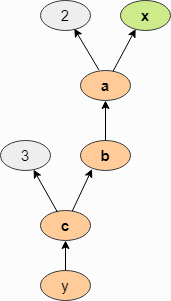

We can perform backpropagation on the computation graph by calling the function backward() on the last output, which effectively calculates the gradients for each tensor that has the property requires_grad=True

In [94]:
y.backward()

In [95]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


In [96]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [97]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [98]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

/home/sanjar/.conda/envs/yolonew/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [104]:
import time
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 0.28378s
GPU time: 0.02115s


### Learning by example: XOR

In PyTorch, there is a package called **torch.nn** that makes building neural networks more convenient. We will make simple classification with XOR example

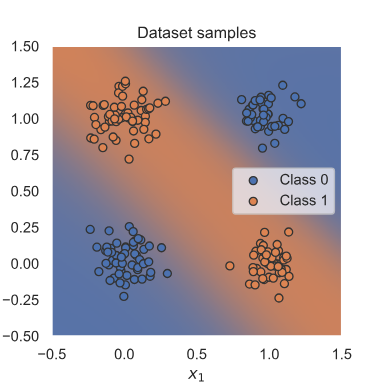

In [106]:
import torch.nn as nn
import torch.nn.functional as F

class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

We can now make use of the pre-defined modules in the torch.nn package, and define our own small neural network. We will use a minimal network with a input layer, one hidden layer with tanh as activation function, and a output layer. In other words, our networks should look something like this:

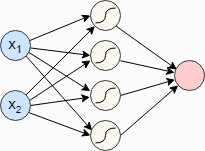

The input neurons are shown in blue, which represent the coordinates x1 and x2 of a data point. The hidden neurons including a tanh activation are shown in white, and the output neuron in red. In PyTorch, we can define this as follows:

In [111]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super(SimpleClassifier, self).__init__()
        # Define the parameters that you will need. In this case, we need weight matrices for the two layers
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
        
        def forward(self, x):
            # Define the sequence of operations
            x = self.linear1(x)
            x = self.act_fn(x)
            x = self.fc2(x)
            return x


In [112]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing model's all submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


The parameters of the module can be obtained by using its *parameters()* function, or *named_parameters()* to get a name to each parameter object

In [113]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear1.weight | Size: torch.Size([4, 2]) | Values : tensor([[-0.0247,  0.0318],
        [-0.2932,  0.5776]], grad_fn=<SliceBackward0>) 

Layer: linear1.bias | Size: torch.Size([4]) | Values : tensor([-0.1776,  0.4578], grad_fn=<SliceBackward0>) 

Layer: linear2.weight | Size: torch.Size([1, 4]) | Values : tensor([[ 0.4990, -0.1282,  0.3357, -0.2850]], grad_fn=<SliceBackward0>) 

Layer: linear2.bias | Size: torch.Size([1]) | Values : tensor([-0.2484], grad_fn=<SliceBackward0>) 



### The data

In [114]:
import torch.utils.data as data

The data package defines two classes which are the standard interface for handling data in PyTorch: data.Dataset, and data.DataLoader. The dataset class provides an uniform interface to access the training/test data, while the data loader makes sure to efficiently load and stack the data points from the dataset into batches during training.

The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch, we simply specify two functions: __getitem__, and __len__. The get-item function has to return the i-th data point in the dataset, while the len function returns the size of the dataset. For the XOR dataset, we can define the dataset class as follows:

In [119]:
class XORdataset(data.Dataset):
    def __init__(self, size, std=0.1):
        '''
        Inputs: 
        - size: Number of samples in the dataset
        - std: Standard deviation of the Gaussian noise
        '''
        super().__init__()
        self.size = size
        self.std = std
        self.generate_xor()
        
    def generate_xor(self):
            # Randomly sample data points
            # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
            # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
            # If x=y, the label is 0.
            data = torch.randint(low = 0, high = 2, size = (self.size, 2), dtype = torch.float32)
            label = (data.sum(dim=1) == 1).to(torch.long)
            
            # To make it slightly more challenging for the classifier, we add a bit of gaussin noise to the data points
            data += self.std * torch.randn(data.shape)
            
            self.data = data
            self.label = label
            
    def __len__(self):
        # Number of samples in the dataset. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size
    def __getitem__(self, idx):
        # Returns the idx-th data point of the dataset
        # If we have multiple things to to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [122]:
# Lets crate such data and inspect it
dataset = XORdataset(size=200)
print("Size of  Data: ", len(dataset))
print("Data point 85:", dataset[85])

Size of  Data:  200
Data point 85: (tensor([0.0545, 1.0011]), tensor(1))


To better relate to the dataset, we visualize the samples below.

In [127]:
import matplotlib.pyplot as plt
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor='b', label='Class 0')
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor='r', label='Class 1')
    plt.title("Toy Dataset")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    

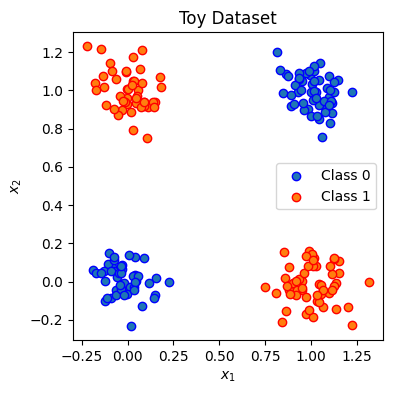

In [128]:
visualize_samples(dataset.data, dataset.label)
plt.show()

### The DataLoader class

The class *torch.utils.data.DataLoader* represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The data loader communicates with the dataset using the function **__getitem__**, and stacks its outputs as tensors over the first dimension to form a batch. In contrast to the dataset class, we usually don’t have to define our own data loader class, but can just create an object of it with *the dataset as input*. Additionally, we can configure our data loader with the following input arguments

- **batch_size**: Number of samples to stack per batch
- **shuffle**: if True, the data is returned in a random order. This is important during training for introducing stochasticity
- **num_workers**: Number of subprocesses to use for data loading. The deafult is* 0*, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes considerable amount of time, e.g. large images. More workers are recommended for those, but cause issues on Windows computers. For tiny datasets as ours, default *0* workers are faster

> The num_workers argument in a PyTorch DataLoader specifies how many subprocesses to use for data loading. The main benefit of using multiple processes is that it can overlap the computation and data loading, so that you can do training on one batch while the data loader is loading the next batch, which can lead to significant speedups.

> Here's a bit more detail: If num_workers is set to 0 (the default), it means that data will be loaded in the main process using a single CPU core. This can be slow, especially for large datasets or complex data loading. If num_workers is set to a number greater than 0, that many worker processes will be created, and they will load data in parallel. This can significantly speed up data loading, but it also uses more CPU cores and memory.

> The optimal number of workers is dependent on several factors, including the speed of your CPU, the speed of your storage, the batch size, and other workloads running on your machine. A common rule of thumb is to use num_workers equal to the number of CPU cores. However, note that setting num_workers to a high number won't always lead to faster data loading. There is a cost associated with starting up and communicating with worker processes. If data loading is not a bottleneck in your training, increasing num_workers might not lead to any speedup and could even slow things down due to the overhead of managing more worker processes.

- **pin_memory**: If True, the dataloader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a trianing set, but not neceserraliy for validation and test to save memory on the GPU.